# Stærðfræði og reiknifræði – Fyrirlestraræfing 9

## Orð og frasar tengdir hópaskiptingu (*clustering*)
Þessi fyrirlestraræfing snýst um *k-means* reikniritið. Byrjum á að átta okkur aðeins á ýmsum orðum og frösum sem koma við sögu. 

Í ***kennslubókinni*** eru hlutirnir sem raðað er í hópa kallaðir ***vectors*** (vigrar), og í gulu skýringunum eru ýmis orð notuð um þá:
    - einstaklingar, hlutir, punktar, meðlimir
**Hóparnir** (eða flokkarnir) sjálfir eru svo kallaðir ***groups*** eða ***clusters***, og það að **raða í hópa** er kallað ***grouping*** eða ***partitioning***. Fulltrúar hópanna eru ýmist kallaðir ***representatives*** eða ***centroids***.

Í ***Scipy skjölun*** koma svo ýmis önnur orð við sögu. Pakkinn sem `kmeans` fallið tilheyrir heitir `scipy.cluster.vq` og `vq` stendur fyrir ***vector quantization***, en bein þýðing væri ***vigurskömmtun***. Skömmtun (*quantization*) er hugtak í eðlisfræði sem snýst t.d. um að orka rafeindar í vetnisatómi getur bara tekið tiltekin strjál (*discrete*) gildi. Sama hugtak er svo notað í tölvunarfræði, t.d. þegar við fækkum litum í litmynd úr milljónum í 256 eða 16, eða þegar við látum þungamiðju eða fulltrúa hóps koma í stað hópsins alls.

Scipy kallar svo hlutina/punktana/vigrana sem skipt er í hópa ***observations*** (a.m.k. stundum) og stökin í þeim ***features*** (eins og bókin gerir líka). Hugtökin *code* og *code book* koma svo mikið við sögu. Vörpunin milli fulltrúa og hópa er kölluð ***code book*** sem þýðir upphaflega *dulmálslykill*. Hún er útfærð með fylki þar sem röð nr. $i$ er fulltrúi hóps nr. $i$. Orðið ***code*** er svo notað um ***hópnúmer***. Enn einn munur á kennslubókinni og Scipy er að kmeans fallið lágmarkar summu fjarlægða frá fulltrúum (sem er kölluð ***distortion***) í stað kvaðratsummu fjarlægðanna, en líklega skiptir nú ekki öllu máli hvort er gert. Eins og sést hér á eftir finnur fallið `kmeans` bara fulltrúa fyrir flokkunargögn og svo þarf að kalla á `vq` til að finna hópnúmer hvers og eins.

## Forvinnsla gagna sem flokka skal
Eitt enn sem Scipy býður upp á er fallið ***`whiten`*** sem staðlar (*standardizes*, *normalizes*) einkenni (*features*) í punktasafni með því að deila með staðalfráviki hvers einkennis, svo þau hafi öll staðalfrávik 1. Tökum sem dæmi að við ætlum að flokka menn eftir hæð og þyngd, og hæðin sé í metrum en þyngdin í kílóum. Án stöðlunar mundu hæðirnar hafa lítil sem engin áhrif á röðun í hópa.

## Upplýsingar í SciPy skjöluninni
Hér er [yfirlit yfir vq-pakkann](https://docs.scipy.org/doc/scipy/reference/cluster.vq.html) í SciPy-skjöluninni þar sem m.a. er rætt um *codes* og *code books*. Aftast á vefsíðunni er reyndar misskilningur í gangi, sá að með því að flokka liti í málverki af hafinu fáist margir bláir fulltrúar, en flokkun lita í andlitsmynd gæfi marga andlitslitaða fulltrúa. Til þess að það gerðist þyrftum við flokkara sem gæfi svipaða hópastærð, en reyndar tókst mér ekki að finna neinn augljósan slíkan kost.

Annar vinsæll Python-pakki sem m.a. getur flokkað er "Scikit-learn" (fluttur inn með `import sklearn.cluster` o.fl.). Þar er m.a. að finna mjög vinsælan flokkara sem heitir *DBSCAN*. Hér er áhgugaverð [vefsíða með flokkunarmyndum](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html) sem búnar eru til með ýmsum flokkurum úr Scikit-learn.

## Notkun k-means í Scipy
Pakkinn `vq` gerir ráð fyrir að hlutirnir sem á að flokka í hópa séu vigrar sem mynda raðir í gagnafylki `X`, og dálkarnir eru þá einkennin. Hér er dæmigerð runa kalla (miðað við skipunina `from scipy.cluster.vq import...` í byrjunarreitnum að ofan):

    X = ...                              # búa til gögn /lesa úr skrá
    X = whiten(X)                        # deila í hvern dálk með staðalfráviki hans
    (codebook, distortion) = kmeans(X,5) # 5 hópar, skilar 5-línu fylki með fulltrúum
    (code, dvec) = vq(X, codebook)       # code[i] = hópnúmer i-tu línu X, 
                                         # dvec[i] = fjarlægð hennar frá sínum fulltrúa

In [2]:
#BYRJA -- Keyrið til að frumstilla.
import numpy as np, numpy.random as npr
import scipy.stats as stat, statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans, whiten, vq
plt.rc('axes', axisbelow=True)
%matplotlib inline
# disp(x,y...) skrifar x,y... með 3 aukastöfum
def disp(*args): print(*(f'{a:.3f}' if isinstance(a,float) else a for a in args))
np.set_printoptions(precision=4, floatmode='fixed', suppress=True)

## Æfingar
### A. Einfalt dæmi
Búið til slembipunkta í planinu með `X = npr.rand(20,2)` og skiptið í 3 hópa með `kmeans` og `vq`. Teiknið með `plt.scatter` og litið hvern punkt eftir hópnúmeri.

[2 1 0 1 1 0 2 1 0 0 2 1 1 0 0 0 0 2 2 0]


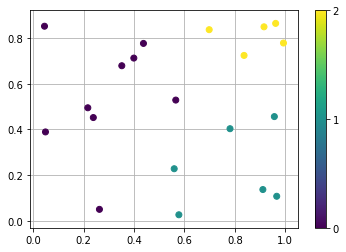

In [12]:
X = npr.rand(20,2)
x0 = X[:,0] 
x1 = X[:,1]
(cb,d) = kmeans(X,3)
(code, dv) = vq(X,cb)
disp(code)
plt.scatter(x0,x1,c=code);
plt.colorbar(ticks=[0,1,2])
plt.grid()

### B. Hiti og úrkoma í stykkishólmi
Lesið skrána `hiti-úrkoma.txt` inn í þrjá vigra: ár, hiti, úrkoma. Búið til n x 2 fylki úr hita og úrkomu, staðlið gögnin með `whiten` og flokkið í fjóra flokka með `kmeans` og `vq`.
Teiknið og bætið við colorbar. 

### C. Betri mynd af hita og úrkomu
Næst á dagskrá er að laga og bæta myndina. Kristján mun leysa þetta dæmi